# Detect Diagonal Lines in an Image

## Using Hough Transform

In order to detect diagonal lines on an image we can use  the mapping of edge points of an image to hough space. 

These are the steps to roughly follow:
1.   translate image into grey scale
2.   apply an image filter that will detect the edges
3.   translate into Hough space (Probabilistic Hough Transform)
4.   determine which lines are the ones we want

There are a ton of python libraries that can help us do this...and some that do it for us! The following code demonstrates an algorithm for finding lines in an image using [skimage](https://scikit-image.org/docs/dev/auto_examples/edges/plot_line_hough_transform.html#sphx-glr-auto-examples-edges-plot-line-hough-transform-py). Within skimage we use two main functions from the feature module: The first is **canny** which applies an image kernal to detect edges and the second is **probablistic_hough_line** which returns the lines found.


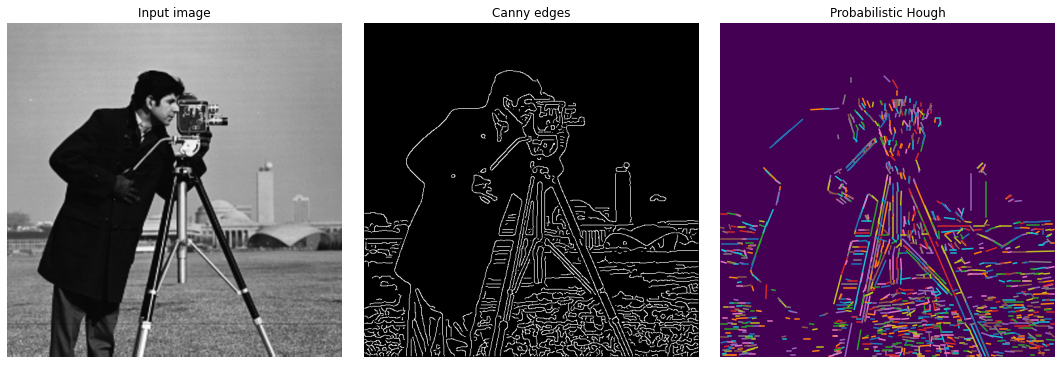

In [ ]:
import numpy as np

from skimage.transform import probabilistic_hough_line
from skimage.feature import canny
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm


# Line finding using the Probabilistic Hough Transform
image = data.camera()
edges = canny(image, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=10, line_length=5,
                                 line_gap=3)

# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()

With this goal in mind I developed code of my own to detect diagonal lines of a given angle. I was not able to add a custom image kernel to the code. I think there is a way to do it but it was already pretty complicated and this seems to work pretty well.

theta = 150.0
theta = 150.0
theta = 150.0


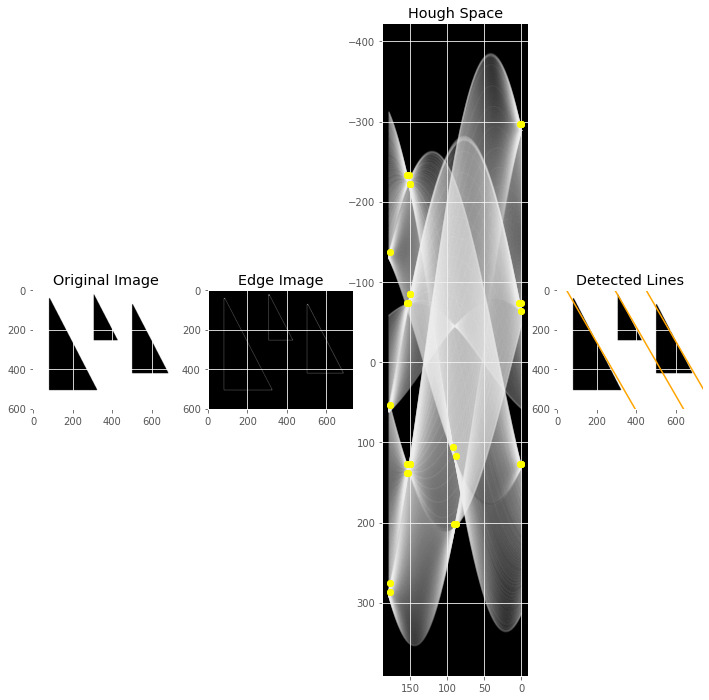

In [ ]:
"""
Hough Transform:  An algorithm for finding lines in images.

This version highlights a line at a given angle.

Source of code:  https://towardsdatascience.com/tagged/hough-transform

Wikipedia:  https://en.wikipedia.org/wiki/Hough_transform
Nice YouTube video:  https://youtu.be/4zHbI-fFIlI

Good explanation:
https://aishack.in/tutorials/hough-transform-basics/

"""

import cv2 # pip install opencv-python (Version: 4.4.0.44)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def line_detection_vectorized(image, edge_image, num_rhos=180, num_thetas=180, t_count=220):
  edge_height, edge_width = edge_image.shape[:2]
  edge_height_half, edge_width_half = edge_height / 2, edge_width / 2
  #
  d = np.sqrt(np.square(edge_height) + np.square(edge_width))
  dtheta = 180 / num_thetas
  drho = (2 * d) / num_rhos
  #
  thetas = np.arange(0, 180, step=dtheta)
  rhos = np.arange(-d, d, step=drho)
  #
  cos_thetas = np.cos(np.deg2rad(thetas))
  sin_thetas = np.sin(np.deg2rad(thetas))
  #
  accumulator = np.zeros((len(rhos), len(rhos)))
  #
  figure = plt.figure(figsize=(12, 12))
  subplot1 = figure.add_subplot(1, 4, 1)
  subplot1.imshow(image)
  subplot2 = figure.add_subplot(1, 4, 2)
  subplot2.imshow(edge_image, cmap="gray")
  subplot3 = figure.add_subplot(1, 4, 3)
  subplot3.set_facecolor((0, 0, 0))
  subplot4 = figure.add_subplot(1, 4, 4)
  subplot4.imshow(image)
  #
  edge_points = np.argwhere(edge_image != 0)
  edge_points = edge_points - np.array([[edge_height_half, edge_width_half]])
  #
  rho_values = np.matmul(edge_points, np.array([sin_thetas, cos_thetas]))
  #
  accumulator, theta_vals, rho_vals = np.histogram2d(
      np.tile(thetas, rho_values.shape[0]),
      rho_values.ravel(),
      bins=[thetas, rhos]
  )
  accumulator = np.transpose(accumulator)
  lines = np.argwhere(accumulator > t_count)
  
  # print(f"lines = {lines}")
  rho_idxs, theta_idxs = lines[:, 0], lines[:, 1]
  r, t = rhos[rho_idxs], thetas[theta_idxs]

  for ys in rho_values:
    subplot3.plot(thetas, ys, color="white", alpha=0.05)

  subplot3.plot([t], [r], color="yellow", marker='o')

  for i, line in enumerate(lines):
    y, x = line
    rho = rhos[y]
    theta = thetas[x]
    a = np.cos(np.deg2rad(theta))
    b = np.sin(np.deg2rad(theta))
    x0 = (a * rho) + edge_width_half
    y0 = (b * rho) + edge_height_half
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    # Grab y1) and (x2, y2) to calculate the angle using angle = arctan(slope).
    # Add 0.001 to avoid a division-by-zero error for 90 degree angles.
    # print(f"The angle for line-{i+1} is {np.rad2deg(np.arctan((y2-y1)/(x2-x1+0.001)))}")
    
    

    subplot3.plot([theta], [rho], marker='o', color="yellow")
    # subplot4.add_line(mlines.Line2D([x1, x2], [y1, y2], color='orange'))
    #***********************************************************************************
    # This picks the angle, theta, that is highlighted orange in the last subplot.
    # Note the angle is measure as for the Hough Transform using a perpendicular line from
    # the origin.
    #***********************************************************************************
    if 149.5 <= theta <= 150.5:
        print(f'theta = {theta}')
        subplot4.add_line(mlines.Line2D([x1, x2], [y1, y2], color='orange'))
         
  subplot3.invert_yaxis()
  subplot3.invert_xaxis()

  subplot1.title.set_text("Original Image")
  subplot2.title.set_text("Edge Image")
  subplot3.title.set_text("Hough Space")
  subplot4.title.set_text("Detected Lines")
  # subplot5.title.set_text("One of the Lines Detected")
  plt.show()

  return accumulator, rhos, thetas, lines


if __name__ == "__main__":
  # loops through the images sample1.png, sample2.png, sample3.png, and ..., samplek.png.
  k = 1 # Number of images.
  for i in range(k):
    # image_name = 'table'
    # image = cv2.imread(f"{image_name}-{i+1}.png")
    image = cv2.imread(f"sample_data/sample-{6}.png")
    edge_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edge_image = cv2.GaussianBlur(edge_image, (3, 3), 1)
    edge_image = cv2.Canny(edge_image, 100, 200)
    edge_image = cv2.dilate(
        edge_image,
        cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)),
        iterations=1
    )
    edge_image = cv2.erode(
        edge_image,
        cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)),
        iterations=1
    )
    #  Note that line_detection_vectorized returns the following:
    #  accumulator, rhos, thetas, lines
    #  So I used multiple assignment to pull out the line information.
    #  The list lines is a list of list-pairs giving rho and theta for each line.
    a, b, c, lines = line_detection_vectorized(image, edge_image)
    # print(f'rho and theta for each line = {lines}')

## Image Kernals for Diagonal Line Detection
Next are two simplier diagonal line detectors using 3x3 image kernals.

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 249, 499, 1)       10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
Image


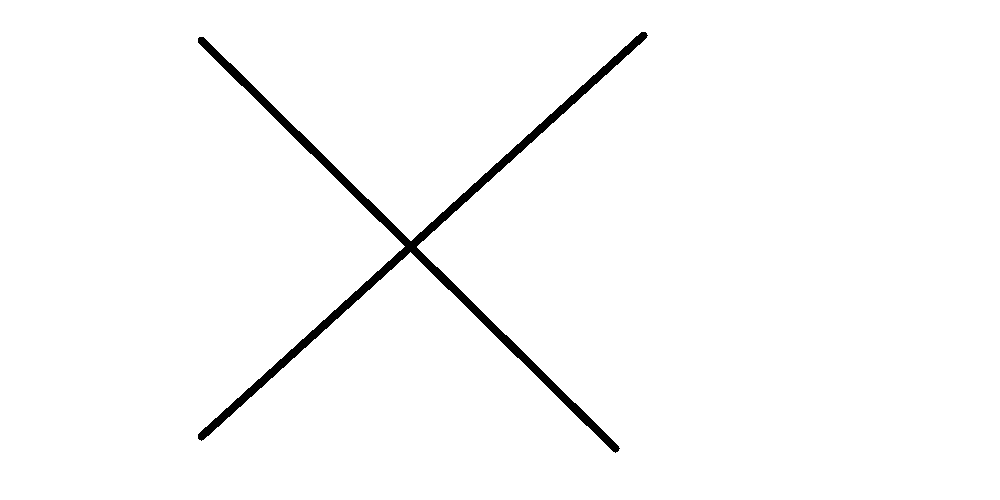

Lines


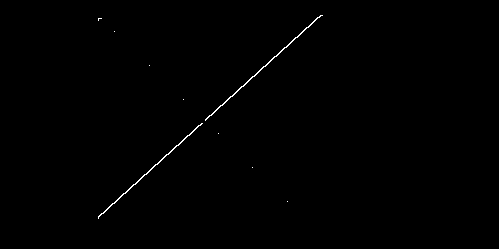

Image


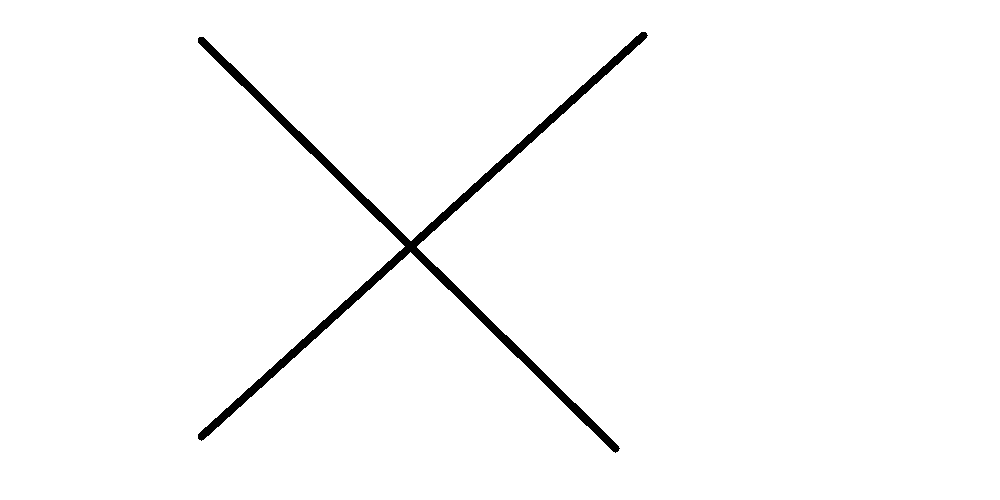

Lines


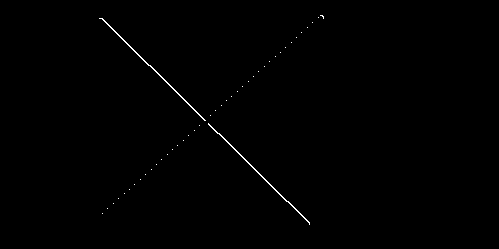

In [ ]:
# https://machinelearningmastery.com/padding-and-stride-for-convolutional-neural-networks/
#
#example of vertical line filter with a stride of 2
from numpy import asarray
from keras.models import Sequential
from keras.layers import Conv2D
import cv2	# used to read image and convert to grayscale
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt	

# import image
img = cv2.imread("sample_data/sample-3.png")
Xsize = img.shape[0]
Ysize = img.shape[1]
# convert to greyscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
data = gray.reshape(1,Xsize,Ysize,1)

# create model
model = Sequential()
model.add(Conv2D(1, (3,3), strides=(2, 2), input_shape=(Xsize,Ysize, 1)))  # change stride here
# summarize model
model.summary()
# define a line detector (3x3)
line_detector1 = [[[[1]],[[2]],[[0]]],
            		  [[[2]],[[0]],[[-2]]],
           			  [[[0]],[[-2]],[[-1]]]]

line_detector2 = [[[[0]],[[2]],[[1]]],
            		[[[-2]],[[0]],[[2]]],
           			[[[-1]],[[-2]],[[0]]]]

weights = [asarray(line_detector1), asarray([0.0])]
# store the weights in the model
model.set_weights(weights)
# apply filter to input data
yhat = model.predict(data)
lines = yhat[0]

# show images
titles = ["Image", "Lines"]
images = [img, lines]

for i in range(2):
	print(titles[i])
	cv2_imshow(images[i])
 
weights = [asarray(line_detector2), asarray([0.0])]
# store the weights in the model
model.set_weights(weights)
# apply filter to input data
yhat = model.predict(data)
lines = yhat[0]

# show images
titles = ["Image", "Lines"]
images = [img, lines]

for i in range(2):
	print(titles[i])
	cv2_imshow(images[i])